In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
from scipy.stats import shapiro

## K-means clustering based on precipitation and snow for California stations

In [3]:
# Reading in data for 2022
weather_data_us_2022 = pd.read_csv('2022_US_NOOA_WeatherData.csv')

In [4]:
# Filtering data for 2022 and flagging if stations are in California or not using station id substring
weather_data_us_2022['CA_flag'] = np.where(weather_data_us_2022['station_id'].str[:5] == 'US1CA', 
                                           'California station', 'Other state')


In [39]:
# Reading in data for 2021
weather_data_us_2021 = pd.read_csv('2021_US_NOOA_WeatherData.csv')

In [17]:
# Filtering data for 2022 and flagging if stations are in California or not using station id substring
weather_data_us_2021['CA_flag'] = np.where(weather_data_us_2021['station_id'].str[:5] == 'US1CA', 
                                           'California station', 'Other state')


In [5]:
# Further filtering 2022 data for California stations only
weather_data_us_2022_cali = weather_data_us_2022.loc[weather_data_us_2022["CA_flag"] == 'California station'] 

In [19]:
# Further filtering 2021 data for California stations only
weather_data_us_2021_cali = weather_data_us_2021.loc[weather_data_us_2021["CA_flag"] == 'California station'] 

In [6]:
# Number of null values in each column
nulls_per_column = weather_data_us_2022_cali.isnull().sum()

print("nulls in each column: ")
print(nulls_per_column)

nulls in each column: 
Unnamed: 0           0
station_id           0
date                 0
PRCP                39
SNOW             32429
TAVG            166965
TMAX            166965
TMIN            166965
country_code         0
CA_flag              0
dtype: int64


In [21]:
# Number of null values in each column
nulls_per_column = weather_data_us_2021_cali.isnull().sum()

print("nulls in each column: ")
print(nulls_per_column)

nulls in each column: 
Unnamed: 0           0
station_id           0
date                 0
PRCP                22
SNOW             25270
TAVG            130727
TMAX            130727
TMIN            130727
country_code         0
CA_flag              0
dtype: int64


In [7]:
# Filling NA/NaN for precipitaion and snow for 2022 data with 0
weather_data_us_2022_cali['PRCP'] = weather_data_us_2022_cali['PRCP'].fillna(0)
weather_data_us_2022_cali['SNOW'] = weather_data_us_2022_cali['SNOW'].fillna(0)

C:\Users\veena\AppData\Local\Temp\ipykernel_41164\839279722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_us_2022_cali['PRCP'] = weather_data_us_2022_cali['PRCP'].fillna(0)
C:\Users\veena\AppData\Local\Temp\ipykernel_41164\839279722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_us_2022_cali['SNOW'] = weather_data_us_2022_cali['SNOW'].fillna(0)


In [8]:
# Subsetting data for aggregation
weather_data_us_2022_cali_agg = pd.DataFrame(weather_data_us_2022_cali[['station_id','PRCP', 'SNOW']])

In [9]:
# Reset of index before aggregation
weather_data_us_2022_cali_agg = weather_data_us_2022_cali_agg.reset_index()

In [10]:
weather_data_us_2022_cali_agg

,index,station_id,PRCP,SNOW
0,372593,US1CAAL0001,0.0,0.0
1,372594,US1CAAL0001,0.0,0.0
2,372595,US1CAAL0001,0.0,0.0
3,372596,US1CAAL0001,218.0,0.0
4,372597,US1CAAL0001,15.0,0.0
...,...,...,...,...
166960,539553,US1CAYL0035,236.0,0.0
166961,539554,US1CAYL0035,38.0,0.0
166962,539555,US1CAYL0035,69.0,0.0
166963,539556,US1CAYL0035,81.0,0.0


In [11]:
# Summing up precipitation and snowfall by station for the year 2022
df_weather_cali_grouped = weather_data_us_2022_cali[['station_id','PRCP', 'SNOW']].groupby('station_id')[['PRCP', 'SNOW']].sum()

In [12]:
df_weather_cali_grouped = df_weather_cali_grouped.reset_index()

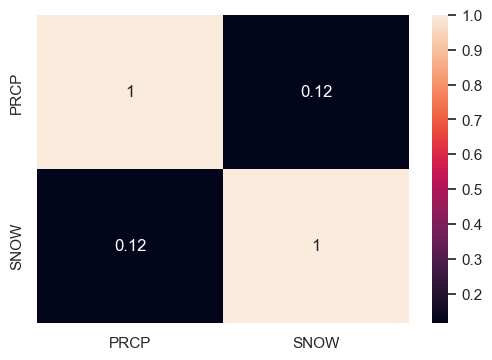

In [71]:
# Heatmap to illustrate relationships between all independent variables -

# Setting size of figure with width 10 and height 8
plt.figure(figsize=(6,4))

# Calculating the correlation matrix on the numeric columns
corr_weather_2022 = df_weather_cali_grouped[['PRCP', 'SNOW']].corr()

# Plotting the heatmap
sns.heatmap(corr_weather_2022, annot=True)

# Displaying the heatmap
plt.show()

# No correlation observed between the variables

In [14]:

# Select the relevant columns for clustering
weather_data_clustering = df_weather_cali_grouped[['PRCP', 'SNOW']]

# Correlation and remove correlated features
# No correlation

# Standardize the data
scaler = StandardScaler()
weather_data_scaled = scaler.fit_transform(weather_data_clustering)

C:\Users\veena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\veena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\veena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\veena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

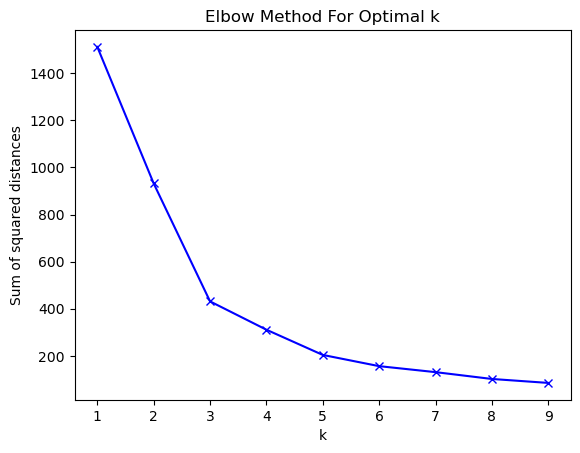

In [15]:
# Elbow curve to get optimal value of k
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate sum of squared distances
ssd = []
K_value_range = range(1,10)  
for k in K_value_range:
    km = KMeans(n_clusters=k)
    km = km.fit(weather_data_scaled)
    ssd.append(km.inertia_)

# Plot sum of squared distances / elbow curve
plt.plot(K_value_range, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [73]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=5)  # Choosing the number of clusters based on elbow plot
kmeans.fit(weather_data_scaled)

# Add the cluster labels to the original dataframe
df_weather_cali_grouped['cluster'] = kmeans.labels_

# Save the dataframe with cluster labels to a new CSV file
df_weather_cali_grouped.to_csv('weather_data_california_clustered.csv', index=False)


C:\Users\veena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\veena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [74]:
# Defining labels for clusters
kmeans_cluster_number = [
    df_weather_cali_grouped['cluster'] == 0, 
    df_weather_cali_grouped['cluster'] == 1, 
    df_weather_cali_grouped['cluster'] == 2, 
    df_weather_cali_grouped['cluster'] == 3,
    df_weather_cali_grouped['cluster'] == 4
]

kmeans_labels = ['Low precip, no snow', 'High precip & snow', 'Very high precip, some snow',
                 'Avg precip, high snow', 'Medium precip, low snow']


# Creating a new label column based on mapping cluster number to label
df_weather_cali_grouped['cluster_label'] = np.select(kmeans_cluster_number, kmeans_labels)

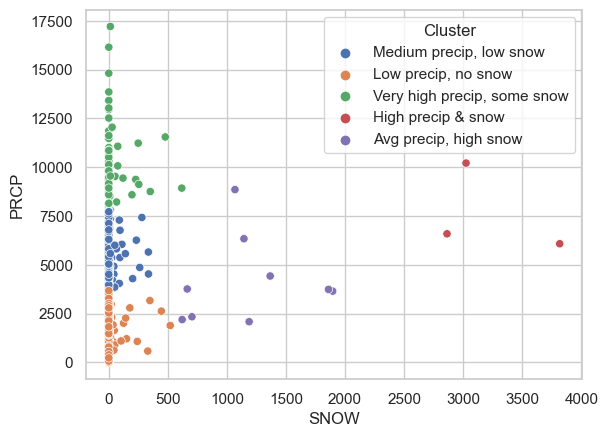

In [75]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Creating a bubble plot
bubble_plot = sns.scatterplot(data=df_weather_cali_grouped, x="SNOW", y="PRCP", 
                              hue="cluster_label", legend="full", palette="deep")

# This is getting skewed by 3 clusters

# Find the handles and labels of the current legend
handles, labels = bubble_plot.get_legend_handles_labels()

plt.legend(title='Cluster')
# Show the plot
plt.show()

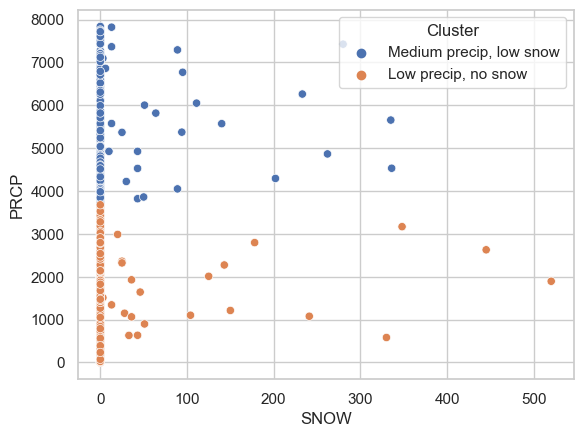

In [77]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Excluding outlier clusters
cluster_df = df_weather_cali_grouped.loc[df_weather_cali_grouped["cluster"] != 1]
cluster_df = cluster_df.loc[cluster_df["cluster"] != 2]
cluster_df = cluster_df.loc[cluster_df["cluster"] != 3]

# Creating a bubble plot
bubble_plot = sns.scatterplot(data=cluster_df, x="SNOW", y="PRCP", 
                              hue="cluster_label", legend="full", palette="deep")

# This view is a bit more spread out after removing the clusters with extreme values

# Find the handles and labels of the current legend
handles, labels = bubble_plot.get_legend_handles_labels()

plt.legend(title='Cluster')
# Show the plot
plt.show()

In [72]:
cluster_df

,station_id,PRCP,SNOW,cluster,cluster_label
4,US1CAAL0011,2715.0,0.0,0,"Very high precip, some snow"
5,US1CAAL0012,3023.0,0.0,0,"Very high precip, some snow"
7,US1CAAL0025,1600.0,0.0,0,"Very high precip, some snow"
9,US1CAAL0034,3611.0,0.0,0,"Very high precip, some snow"
10,US1CAAL0039,3186.0,0.0,0,"Very high precip, some snow"
...,...,...,...,...,...
751,US1CAYL0025,234.0,0.0,0,"Very high precip, some snow"
752,US1CAYL0028,2909.0,0.0,0,"Very high precip, some snow"
753,US1CAYL0029,2539.0,0.0,0,"Very high precip, some snow"
754,US1CAYL0033,2796.0,0.0,0,"Very high precip, some snow"


## T-test to compare 2021 and 2022 median daily temperature across stations in the US

In [40]:
# Converting date string to date format for 2022
weather_data_us_2022['clean_date'] = pd.to_datetime(weather_data_us_2022['date'], format='%Y%m%d')

# Converting date string to date format for 2021
weather_data_us_2021['clean_date'] = pd.to_datetime(weather_data_us_2021['date'], format='%Y%m%d')


In [41]:
# Taking median temperature for all US for the year 2022
df_weather_temp_grouped_2022 = weather_data_us_2022[['clean_date','TAVG']].groupby('clean_date')[['TAVG']].median()

In [43]:
# Taking median temperature for all US station for the year 2021
df_weather_temp_grouped_2021 = weather_data_us_2021[['clean_date','TAVG']].groupby('clean_date')[['TAVG']].median()

In [56]:
_, p_value = ttest_ind(df_weather_temp_grouped_2022['TAVG'].head(282)
                       , df_weather_temp_grouped_2022['TAVG'])
print(f"p-value for independent t-test between 2022 and 2021 median temperature by day is: {p_value}")

p-value for independent t-test between 2022 and 2021 median temperature by day is: 0.0036704045290449705


#### Since p-value is lower than 0.05, we can conclude that there's evidence that there's a significant difference between the median temperatures between years 2021 and 2022

## Shapiro wilk test to check if 2022 median daily temperature across stations in the US is normally distributed or not

##### In the Shapiro-Wilk test, null hypothesis  = Sample is from the normal distributions.(p-value>0.05)
##### Hence, if we obtain a p-value > 0.05, we accept the null hypothesis and can conclude that the data is normally distributed

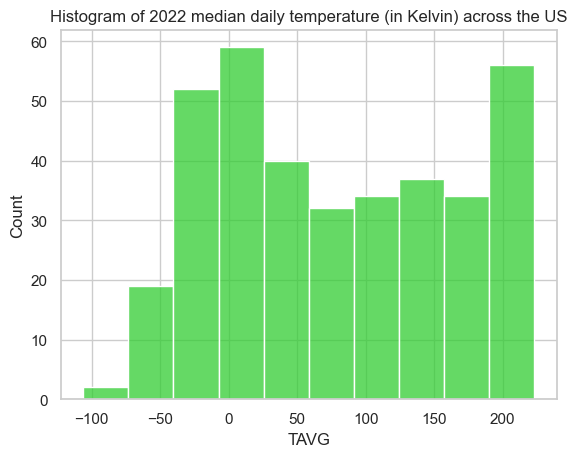

In [68]:
# First we will look at the histogram of temperatures across days


# Creating the histogram for 2022 daily median temperature
sns.histplot(data=df_weather_temp_grouped_2022, x='TAVG', color='limegreen')
plt.title('Histogram of 2022 median daily temperature (in Kelvin) across the US')
plt.show()

#### Through visual inspection of the data, we see a somewhat bimodal distribution of data and doesn't look like a bell curve. We can confirm our suspicion by running the Shapiro Wilk test. 

In [69]:
shapiro_weather_data = shapiro(df_weather_temp_grouped_2022['TAVG'])
shapiro_weather_data

ShapiroResult(statistic=0.9386388063430786, pvalue=3.915789914543666e-11)

#### The p-value <0.05 implying that we reject the null hypothesis and can conclude that the data is NOT normally distributed